In [ ]:
! pip install opencv-python-headless matplotlib scikit-image

In [1]:
import cv2
from skimage.feature import hog
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Load and preprocess the image
image = cv2.imread('image1.jpg', cv2.IMREAD_GRAYSCALE)

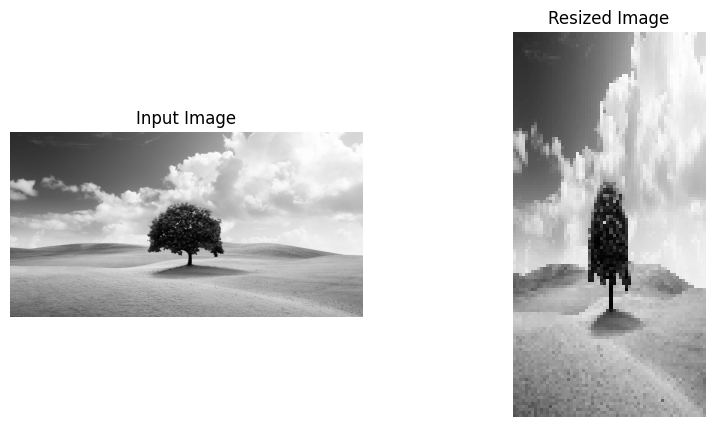

In [9]:
# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load the image.")
else:
    # Resize the image to 64x128
    image_resized = cv2.resize(image, (64, 128))
    # Display the grayscale image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Input Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image_resized, cmap='gray')
    plt.title('Resized Image')
    plt.axis('off')
    
    plt.show()

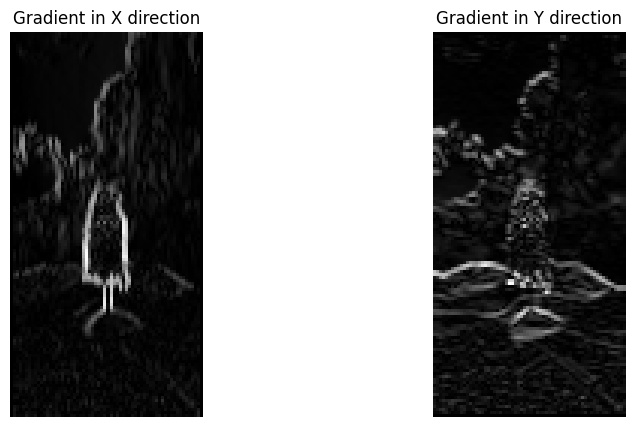

In [10]:
# Calculate gradients along x and y directions
grad_x = cv2.Sobel(image_resized, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(image_resized, cv2.CV_64F, 0, 1, ksize=3)

# Display the gradients
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(np.abs(grad_x), cmap='gray')
plt.title('Gradient in X direction')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.abs(grad_y), cmap='gray')
plt.title('Gradient in Y direction')
plt.axis('off')
plt.show()


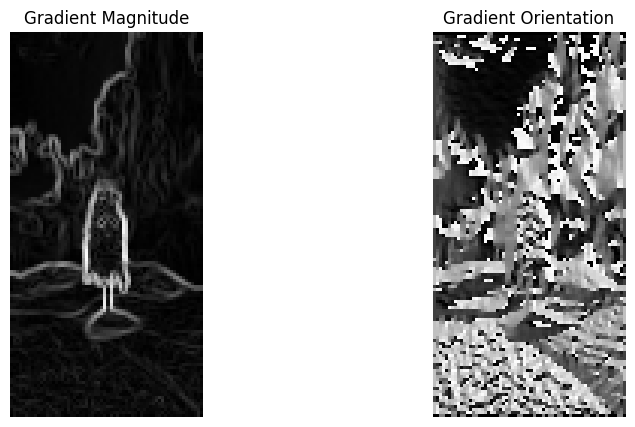

In [11]:
# Calculate the magnitude and orientation of gradients
magnitude = cv2.magnitude(grad_x, grad_y)
orientation = cv2.phase(grad_x, grad_y, angleInDegrees=True)

# Display magnitude and orientation images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(orientation, cmap='gray')
plt.title('Gradient Orientation')
plt.axis('off')
plt.show()

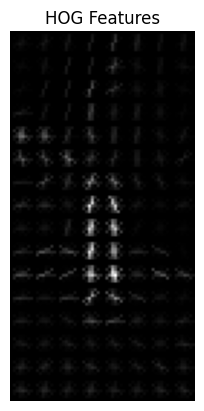

HOG feature vector size: (3780,)


: 

In [ ]:
# HOG feature extraction
hog_features, hog_image = hog(
    image_resized, 
    orientations=9, 
    pixels_per_cell=(8, 8), 
    cells_per_block=(2, 2), 
    block_norm='L2-Hys', 
    visualize=True, 
    transform_sqrt=True
)

# Display the HOG visualization
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Features')
plt.axis('off')
plt.show()

# Print the feature vector size
print(f"HOG feature vector size: {hog_features.shape}")